# Using Python to Analyse Data from a csv
start by importing all the essential data analysis and visualisation libraries.
the data we're using is about employment and level of education data.

In [2]:
import seaborn as sbs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data from csv and convert into pandas dataframe

In [3]:
df13 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2013.csv')
df14 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2014.csv')
df15 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2015.csv')
df16 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2016.csv')
df17 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2017.csv')
df18 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2018.csv')
df19 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2019.csv')
df20 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2020.csv')
df21 = pd.read_csv(r'C:\Users\user\data\dataof\data-jumlah-penduduk-berdasarkan-pekerjaan-per-kelurahan-tahun-2021.csv')

before we do anything we need to concatenate these into one dataframe, we can do this using pandas' concat() line of command.

In [4]:
df = pd.concat([df13,df14,df15,df16,df17,df18,df19,df20,df21])

let's check if the dataframe concatenated properly.

In [5]:
display(df)

,tahun,nama_provinsi,nama_kabupaten/kota,nama_kecamatan,nama_kelurahan,jenis_pekerjaan,jumlah,nama kecamatan,nama_kabupaten,jenis_pekerajaan
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,Belum / Tidak Bekerja,1357.0,NaN,NaN,NaN
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,Belum / Tidak Bekerja,1385.0,NaN,NaN,NaN
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,Belum / Tidak Bekerja,477.0,NaN,NaN,NaN
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,Belum / Tidak Bekerja,474.0,NaN,NaN,NaN
4,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,Belum / Tidak Bekerja,1066.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11579,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,Pelaut,3.0,NaN,NaN,NaN
11580,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,Sopir,55.0,NaN,NaN,NaN
11581,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,Pedagang,113.0,NaN,NaN,NaN
11582,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,Wiraswasta,1829.0,NaN,NaN,NaN


looks like there are some weird columns. we need to fix that before moving on. let's combine the columns with typos into the ones without, specifically 'nama kecamatan' into 'nama_kecamatan', 'nama_kabupaten' into 'nama_kabupaten/kota', and 'jenis_pekerajaan' into 'jenis_pekerjaan' to do this we can use combine_first().

In [6]:
df = pd.concat([df['tahun'],
               df['nama_provinsi'],
               df['nama_kabupaten/kota'].combine_first(df['nama_kabupaten']),
               df['nama_kecamatan'].combine_first(df['nama kecamatan']),
               df['jenis_pekerjaan'].combine_first(df['jenis_pekerajaan']),
               df['jumlah']], axis = 1)
display(df)

,tahun,nama_provinsi,nama_kabupaten/kota,nama_kecamatan,jenis_pekerjaan,jumlah
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,Belum / Tidak Bekerja,1357.0
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,Belum / Tidak Bekerja,1385.0
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,Belum / Tidak Bekerja,477.0
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,Belum / Tidak Bekerja,474.0
4,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,Belum / Tidak Bekerja,1066.0
...,...,...,...,...,...,...
11579,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,Pelaut,3.0
11580,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,Sopir,55.0
11581,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,Pedagang,113.0
11582,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,Wiraswasta,1829.0


Now that we fixed the data, let's start analyzing. first i want to find out which jobs are the most popular in Jakarta by 2021. We can do this by creating a bar chart using matplotlib. But first we need to sort them by order. To sort them by order since the data we have are scattered throughout the years and the total are not summed up so we don't know the numbers of the workers.

To filter the year that we need we can use df.loc to only show the year that we want, in this case '2021'. Next we need to group them by job types, we can use df.groupby then sum up the values of the column 'jumlah' while we're at it. After we've grouped them we can finally sort them by the top 5 jobs that are listed, we use sort_values to sort the jobs by total number of workers, and use head(5) to only show the top 5 jobs.

In [7]:
df2021 = df.loc[df['tahun'] == 2021]
group_df = df2021.groupby('jenis_pekerjaan')['jumlah'].sum().reset_index()
sorted_df = group_df.sort_values('jumlah', ascending = False).head(5)
display(sorted_df)

,jenis_pekerjaan,jumlah
29,Karyawan Swasta,2857644.0
35,Mengurus Rumah Tangga,2105907.0
43,Pelajar/Mahasiswa,1810445.0
86,Wiraswasta,782158.0
14,Buruh Harian Lepas,215975.0


Now we can create the bar chart. First we use figsize to set the size that we want for the chart in this case 15 inches by 8 inches. Then we set the labels of the chart by using .xlabel and .ylabel to set them accordingly. And we set the title by using .title()

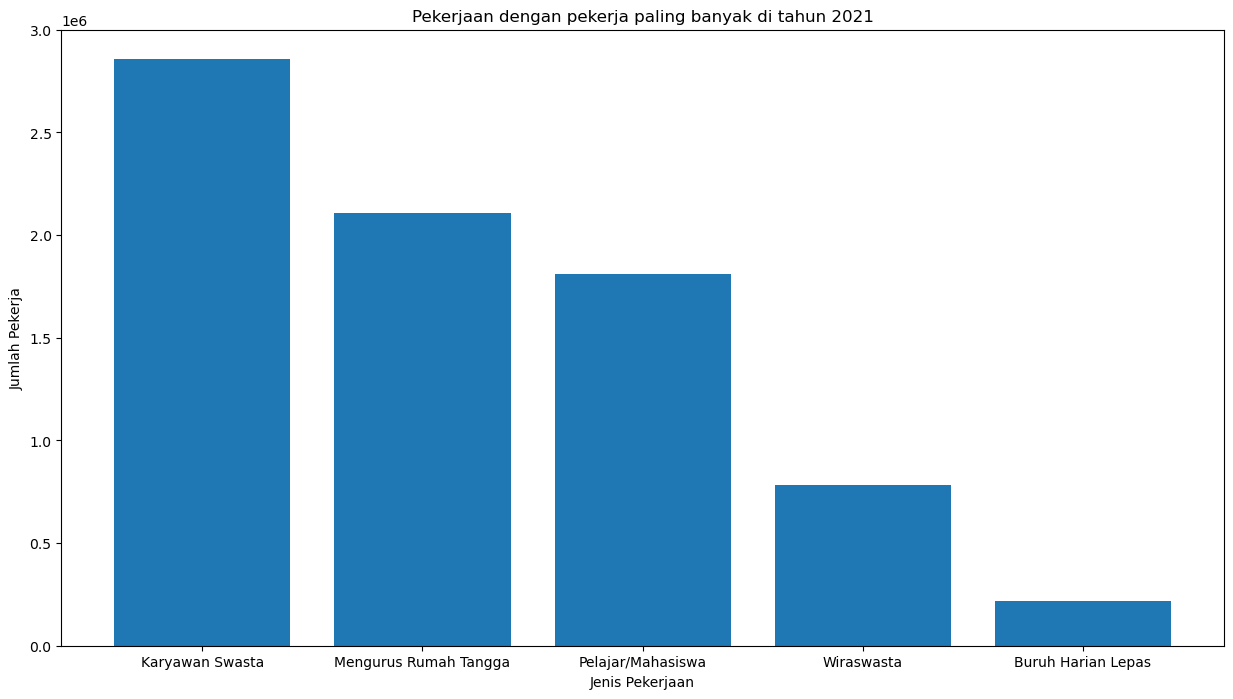

In [8]:
plt.figure(figsize = (15,8))
plt.bar(sorted_df['jenis_pekerjaan'].values, sorted_df['jumlah'].values)
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Pekerja')
plt.title('Pekerjaan dengan pekerja paling banyak di tahun 2021')
plt.show()

We found out that office workers are the most popular job in DKI jakarta in for the year of 2021.

With that done now I want to find out how many unemployed people are there per year, we can do this by using a line chart.
To start off we need to clean the data, some have typos and one of them has an uneeded space, to clean the data we can use the str.replace function to replace a line of string to something else, in this case we use it to fix the different data values we have. After the data has been fixed, we use .groupby to group the data with the years and sum up the worker numbers accordingly. Then we can make the line chart, to do this we use matplotlib's .plot function and give the points some labels using .text

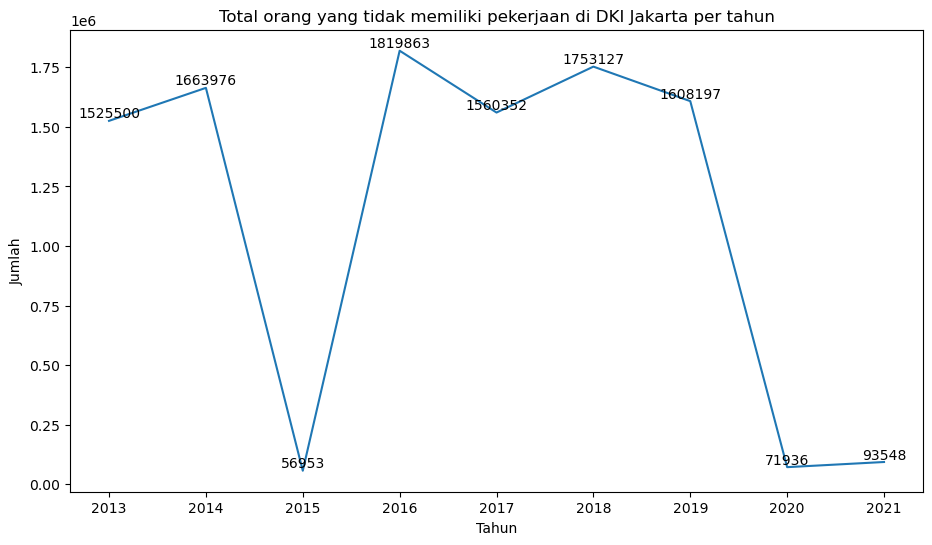

In [9]:
df['jenis_pekerjaan'] = df['jenis_pekerjaan'].str.replace('Belum Bekerja','Belum')
df['jenis_pekerjaan'] = df['jenis_pekerjaan'].str.replace('Belum/Tidak Bekerja', 'Belum / Tidak Bekerja')

df_unemployment = df.loc[df['jenis_pekerjaan'] == 'Belum / Tidak Bekerja']
df_grouped_unemployment = df_unemployment.groupby('tahun').sum()

years = df_grouped_unemployment.index.values
workers = df_grouped_unemployment['jumlah'].values

plt.figure(figsize = (11,6))
plt.plot(years, workers)
for x, y in zip(years, workers):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Total orang yang tidak memiliki pekerjaan di DKI Jakarta per tahun')
plt.show()

From the data we now know that the total of unemployed people in DKI Jakarta reached its peak in 2016 reaching a whopping 1 million 819 thousand 863 people, while the number did decrease in 2020, it picked up some pace again in 2021.

Now i want to find out how many percentage of workers are in each part of the province in the year 2021. 

We first group the data based on cities, then as before we total the numbers of workers in the year 2021. Next we create the pie chart by using the .pie function from matplotlib, and use autopct to show the values as percentages.

In [10]:
city_group_df = df2021.groupby('nama_kabupaten/kota')['jumlah'].sum().reset_index()
display(city_group_df)

,nama_kabupaten/kota,jumlah
0,ADM. KEPULAUAN SERIBU,21260.0
1,JAKARTA BARAT,1959110.0
2,JAKARTA PUSAT,879637.0
3,JAKARTA SELATAN,1816342.0
4,JAKARTA TIMUR,2452968.0
5,JAKARTA UTARA,1392645.0


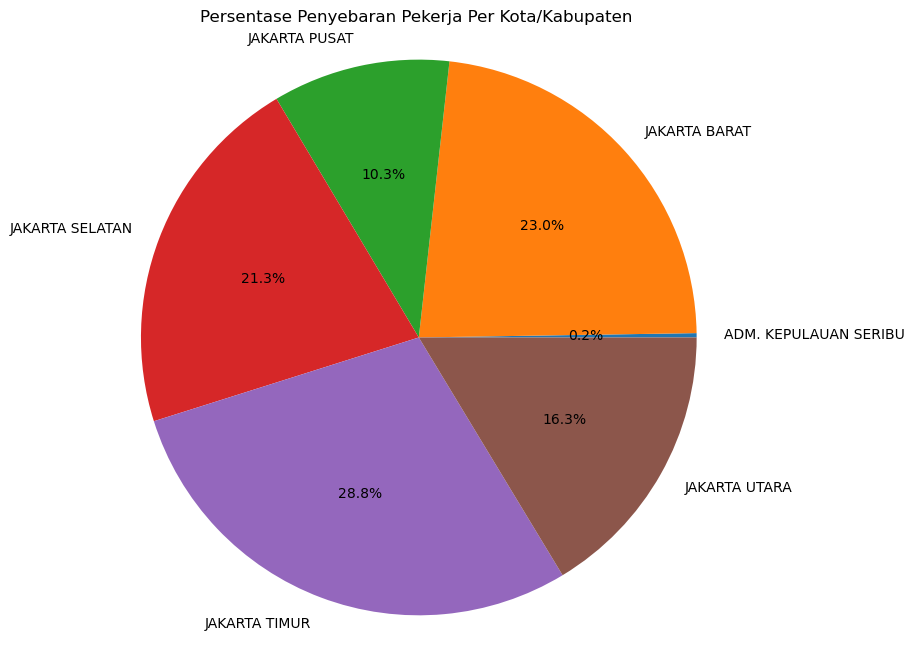

In [11]:
plt.figure(figsize = (10,8))
plt.rcParams['font.size'] = 10
plt.pie(city_group_df['jumlah'], labels=city_group_df['nama_kabupaten/kota'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Persentase Penyebaran Pekerja Per Kota/Kabupaten')
plt.show()

Total of workers in the province of DKI Jakarta can be found in East Jakarta based on the data of 2021.

and that's all i want to know, if you're reading this far thank you.
made using python & jupyter notebook.

by: Leonard Aldo

all of these data can be found from data.jakarta.go.id